# Customer Segmentation - K-Means Analysis

<img src="input/dieter-de-vroomen-452887-unsplash.jpg" style="height:500px">

Photo by [Dieter de Vroomen](https://unsplash.com/@dieterdevroomen)

## Context
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

## Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement You own the mall and want to understand the customers like who can be easily converge Target Customers so that the sense can be given to marketing team and plan the strategy accordingly.

## Inspiration
* How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in simplest way. 
* Who are your target customers with whom you can start marketing strategy easy to converse
* How the marketing strategy works in real world

---

# Libraries imports and first insight

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

First let's explore the dataset first

In [3]:
df = pd.read_csv('./input/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


The features are quite explicit.

In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.duplicated().sum()

0

No need to clean the dataset

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


---

# Data exploration and visualization

Plot pairwise relationships between features in a dataset.

/home/sunflowa/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1152x720 with 0 Axes>

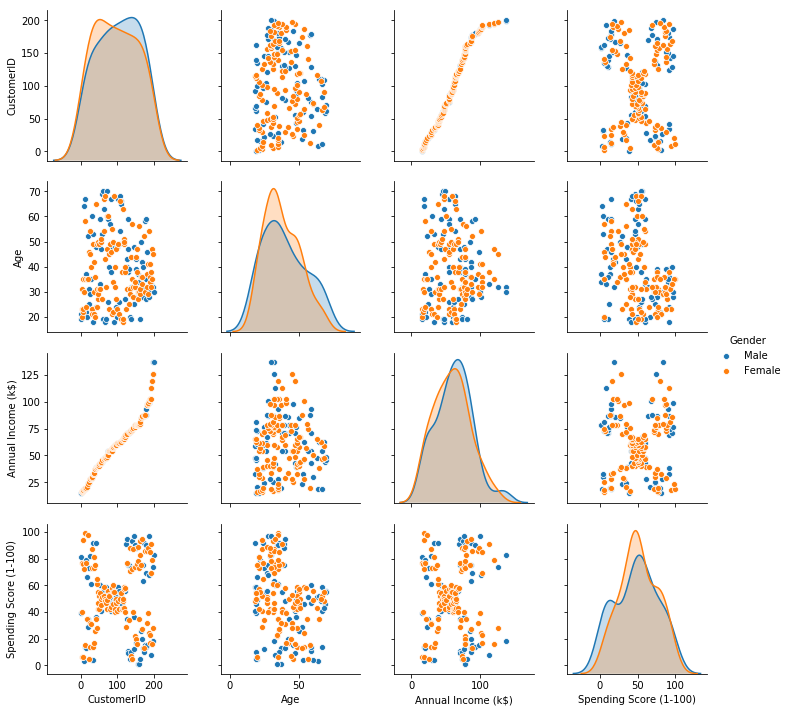

In [8]:
plt.figure(1, figsize=(16,10))
sns.pairplot(data=df, hue='Gender')
plt.show()

Number of male vs female

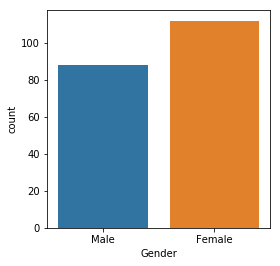

In [9]:
plt.figure(1, figsize=(4,4))
sns.countplot(x='Gender', data=df)
plt.show()

Distribution of numerical features (Age, Annual income & Spending score)

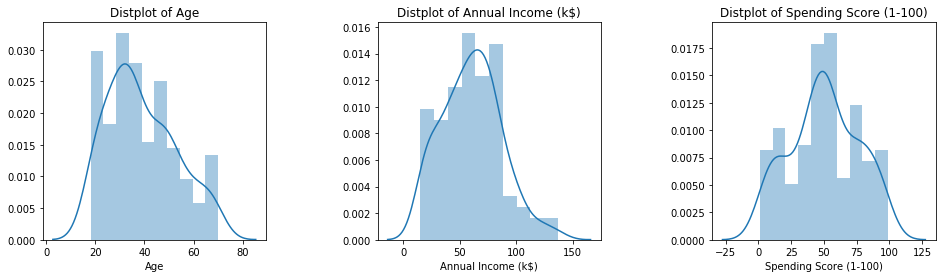

In [10]:
plt.figure(1, figsize=(16,4))
n = 0 
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(df[x] , bins=10)
    plt.title('Distplot of {}'.format(x))
plt.show()

---

# Clustering using K- means

## ML model

__Concept__

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.

A cluster refers to a collection of data points aggregated together because of certain similarities.

You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.

Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.

In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

__How the K-means algorithm works__

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

It halts creating and optimizing clusters when either:

The centroids have stabilized — there is no change in their values because the clustering has been successful.
The defined number of iterations has been achieved.

__Optimal K: the elbow method__

How many clusters would you choose ?


A common, empirical method, is the elbow method. You plot the mean distance of every point toward its cluster center, as a function of the number of clusters.

Sometimes the plot has an arm shape, and the elbow would be the optimal K.

<img src="input/elbow.png" style="height:300px">

Warning: this method does not apply all the time: sometimes you don't have a clear elbow! In any case, you have to check on the data how is the clustering and make sure it makes sense.

## Application in this use-case

Let's perform clustering (optimizing K with the elbow method). In order to simplify the problem, we start by keeping only the two last columns as features.

In [11]:
X = df.iloc[:, -2:]

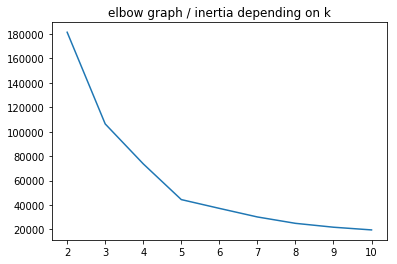

In [12]:
km_inertias, km_scores = [], []

for k in range(2, 11):
    km = KMeans(n_clusters=k).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))
    
sns.lineplot(range(2, 11), km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()

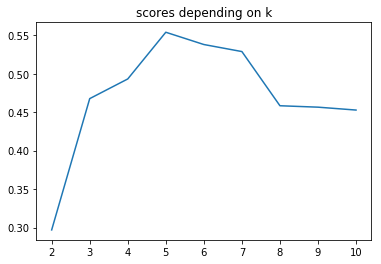

In [13]:
sns.lineplot(range(2, 11), km_scores)
plt.title('scores depending on k')
plt.show()

Now let's apply K-means on more than 2 features.

In [14]:
X = df.iloc[:, -3:]

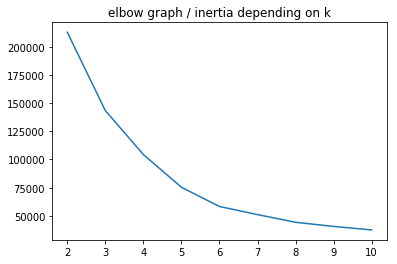

In [15]:
km_inertias, km_scores = [], []

for k in range(2, 11):
    km = KMeans(n_clusters=k).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))
    
sns.lineplot(range(2, 11), km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()

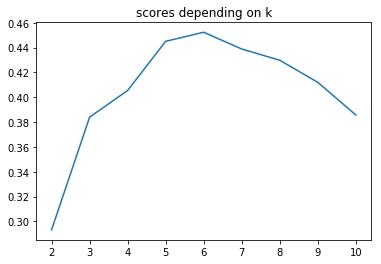

In [16]:
sns.lineplot(range(2, 11), km_scores)
plt.title('scores depending on k')
plt.show()

In [17]:
km = KMeans(n_clusters=5).fit(X)

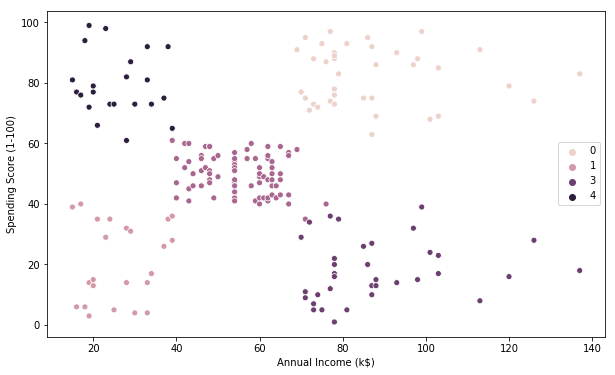

In [18]:
# K-Means visualization on pair of 2 features
plt.figure(figsize=(10, 6))
sns.scatterplot(X.iloc[:, 1], X.iloc[:, 2], hue=km.labels_)
plt.show()

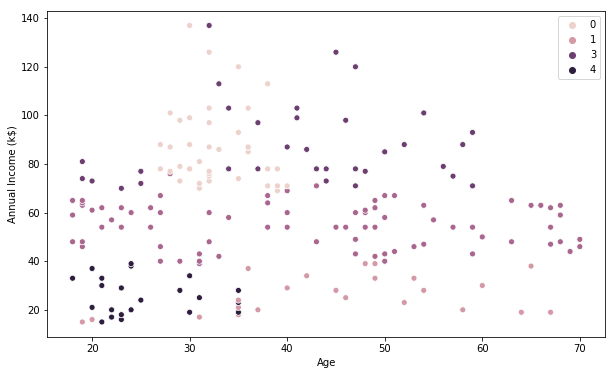

In [19]:
# K-Means visualization on another pair of 2 features
plt.figure(figsize=(10, 6))
sns.scatterplot(X.iloc[:, 0], X.iloc[:, 1], hue=km.labels_)
plt.show()

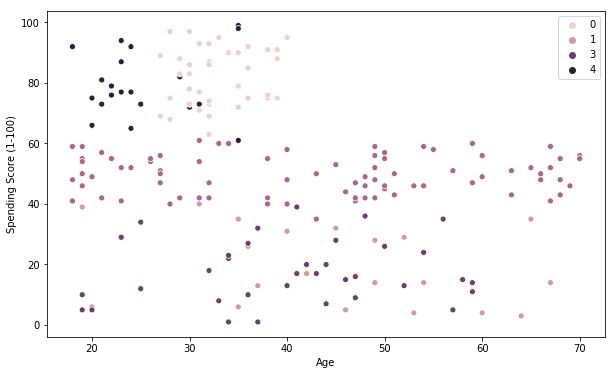

In [20]:
# K-Means visualization on the last pair of 2 features
plt.figure(figsize=(10, 6))
sns.scatterplot(X.iloc[:, 0], X.iloc[:, 2], hue=km.labels_)
plt.show()

## Visualization  of the clusters in a 3D scatter plot.

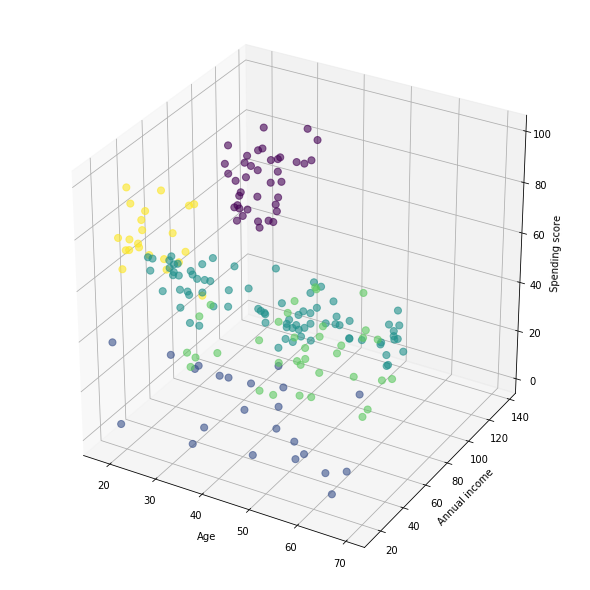

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

xs = X.iloc[:, 0]
ys = X.iloc[:, 1]
zs = X.iloc[:, 2]
ax.scatter(xs, ys, zs, s=50, alpha=0.6, c=km.labels_)

ax.set_xlabel('Age')
ax.set_ylabel('Annual income')
ax.set_zlabel('Spending score')

plt.show()

This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly 5 segments of Customers based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.

## Definition of customers profiles corresponding to each clusters

In [22]:
# Profiles of customers
X['label'] = km.labels_

In [23]:
X.label.value_counts()

2    80
0    39
3    36
1    23
4    22
Name: label, dtype: int64

In [24]:
for k in range(5):
    print(f'cluster nb : {k}')
    print(X[X.label == k].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

cluster nb : 0
             Age  Annual Income (k$)  Spending Score (1-100)
count  39.000000           39.000000               39.000000
mean   32.692308           86.538462               82.128205
min    27.000000           69.000000               63.000000
max    40.000000          137.000000               97.000000



cluster nb : 1
             Age  Annual Income (k$)  Spending Score (1-100)
count  23.000000           23.000000               23.000000
mean   45.217391           26.304348               20.913043
min    19.000000           15.000000                3.000000
max    67.000000           39.000000               40.000000



cluster nb : 2
           Age  Annual Income (k$)  Spending Score (1-100)
count  80.0000             80.0000                 80.0000
mean   42.9375             55.0875                 49.7125
min    18.0000             39.0000                 35.0000
max    70.0000             76.0000                 61.0000



cluster nb : 3
             Age  Annual I

In [25]:
X[X.label == 1].describe().iloc[[0, 1, 3, 7], :-1]

,Age,Annual Income (k$),Spending Score (1-100)
count,23.000000,23.000000,23.000000
mean,45.217391,26.304348,20.913043
min,19.000000,15.000000,3.000000
max,67.000000,39.000000,40.000000


The generated "Clusters of Customers" plot shows the distribution of the 5 clusters. A sensible interpretation for the mall customer segments can be:

* Cluster 1. Customers with medium annual income and medium annual spend
* Cluster 2. Customers with high annual income and high annual spend
* Cluster 3. Customers with low annual income and low annual spend
* Cluster 4. Customers with high annual income but low annual spend
* Cluster 5. Customers low annual income but high annual spend

Having a better understanding of the customers segments, a company could make better and more informed decisions. An example, there are customers with high annual income but low spending score. A more strategic and targeted marketing approach could lift their interest and make them become higher spenders. The focus should also be on the "loyal" customers and maintain their satisfaction.

We have thus seen, how we could arrive at meaningful insights and recommendations by using clustering algorithms to generate customer segments. For the sake of simplicity, the dataset used only 2 variables — income and spend. In a typical business scenario, there could be several variables which could possibly generate much more realistic and business-specific insights.

---

# Credits

* [From Udemy's Machine Learning A-Z course](https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv)
* Few tips for the dataviz are the idea of [kushal1996](https://www.kaggle.com/kushal1996/) and for the final analysis [ioannismesionis](https://www.kaggle.com/ioannismesionis/)
* Explanations of the k-means model by [towardsdatascience](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Vivadata](https://vivadata.org/)